In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("scores_data.csv")

In [3]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [6]:
print("\nBasic info:")
df.info()


Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [12]:
print(df.columns.tolist())

['Batch ', 'User_ID ', '   Score   ']


In [32]:
df["   Score   "] = df["   Score   "].astype(str).str.extract(r"(\d+)").astype(int)

df["   Score   "]

0      6
1      6
2      7
3      7
4      4
      ..
144    4
145    4
146    4
147    3
148    2
Name:    Score   , Length: 149, dtype: int64

In [31]:
print("Unique batches:")
print(df["Batch "].unique())

Unique batches:
['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']


In [33]:
batch_summary = (df.groupby("Batch ")["   Score   "].agg(["count", "mean", "median", "min", "max", "std"]).sort_values("mean", ascending=False)
                 .round(2))

print("\n📊 SUMMARY TABLE BY BATCH:")
print(batch_summary)


📊 SUMMARY TABLE BY BATCH:
            count  mean  median  min  max   std
Batch                                          
AI_ELITE_7     53  5.06     5.0    2    7  1.45
AI_ELITE_6     48  4.23     4.0    0    7  1.64
AI_ELITE_4     48  3.79     4.0    0    7  1.44


In [36]:
bins = [0, 2, 4, 7]
labels = ["Low (0–2)", "Medium (3–4)", "High (5–7)"]

df["Score_Range"] = pd.cut(df["   Score   "], bins=bins, labels=labels, include_lowest=True)

dist = pd.crosstab(df["Batch "], df["Score_Range"], normalize="index") * 100

print("\n📊 SCORE DISTRIBUTION (%):")
print(dist.round(1))


📊 SCORE DISTRIBUTION (%):
Score_Range  Low (0–2)  Medium (3–4)  High (5–7)
Batch                                           
AI_ELITE_4        18.8          56.2        25.0
AI_ELITE_6        12.5          41.7        45.8
AI_ELITE_7         3.8          32.1        64.2


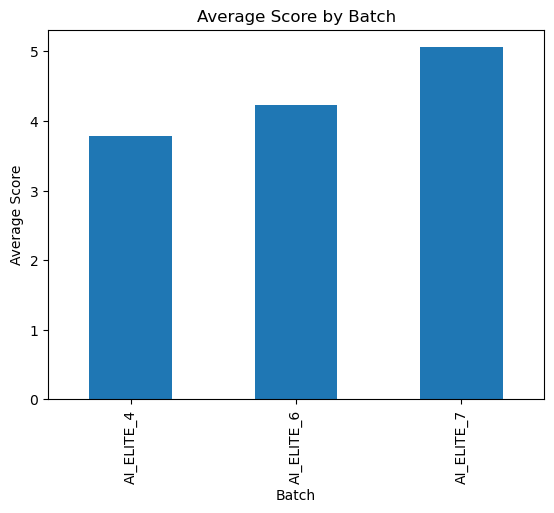

In [37]:
plt.figure()
df.groupby("Batch ")["   Score   "].mean().plot(kind="bar")
plt.title("Average Score by Batch")
plt.ylabel("Average Score")
plt.xlabel("Batch")
plt.show()

<Figure size 640x480 with 0 Axes>

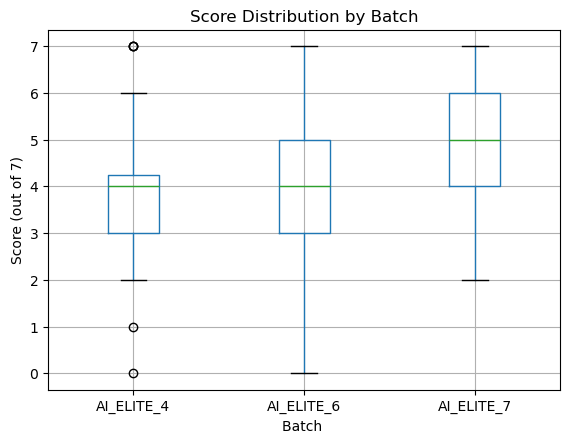

In [38]:
plt.figure()
df.boxplot(column="   Score   ", by="Batch ")
plt.title("Score Distribution by Batch")
plt.suptitle("")
plt.ylabel("Score (out of 7)")
plt.show()

In [42]:
print("KEY INSIGHTS:")

best_batch = batch_summary["mean"].idxmax()
worst_batch = batch_summary["mean"].idxmin()


print("Best performing batch:", best_batch)
print("Worst performing batch:", worst_batch)


KEY INSIGHTS:
Best performing batch: AI_ELITE_7
Worst performing batch: AI_ELITE_4


In [64]:
print("Batch Performance Summary:")
for batch, grp in df.groupby("Batch "):
    print(f"\nBatch: {batch}")
    print("Students:", grp.shape[0])
    print("Max Score:", grp['   Score   '].max())
    print("Min Score:", grp['   Score   '].min())
    print("Median Score:", grp['   Score   '].median())
    print("Average Score:", format(grp["   Score   "].mean(),".2f"))
  

Batch Performance Summary:

Batch: AI_ELITE_4
Students: 48
Max Score: 7
Min Score: 0
Median Score: 4.0
Average Score: 3.79

Batch: AI_ELITE_6
Students: 48
Max Score: 7
Min Score: 0
Median Score: 4.0
Average Score: 4.23

Batch: AI_ELITE_7
Students: 53
Max Score: 7
Min Score: 2
Median Score: 5.0
Average Score: 5.06


This analysis shows that there is a clear difference in performance between the three batches. 

AI_ELITE_7 performed the best overall, with most students scoring higher marks and very few low scores. 

AI_ELITE_6 had a mixed pattern, where some students performed well but many others scored low, showing uneven learning levels. 

AI_ELITE_4 recorded the lowest average scores and had more students in the low-score range, which indicates learning gaps and the need for extra support.

These results suggest that AI_ELITE_4 requires focused academic help, AI_ELITE_6 needs targeted guidance for weaker students, and the methods followed in AI_ELITE_7 can be used as a model to improve the other batches.